<a href="https://colab.research.google.com/github/icollier77/cam-data-science/blob/main/CAM_DS_C101_Activity_3_2_4_Inessa_Collier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 3.2.4 Applying non-parametric tests to a data set

## Scenario
As a data scientist working for an online retail brand, you have been tasked with comparing the customer engagement levels of two new marketing campaigns: Campaign A and Campaign B. To accomplish this, the brand has provided a data set containing engagement scores for each campaign. Your goal is to determine if there is a significant difference in engagement scores between Campaign A and Campaign B.


## Objective
The goal is to compare the effectiveness of two distinct marketing campaigns. The key metric for comparison is the 'Engagement Score', which reflects customer engagement levels with each campaign.

## Assignment criterion
By completing this activity, you will be able to provide evidence that you can demonstrate how to accurately apply parametric and non-parametric methods to analyse diverse data sets.

## Activity guidance
1. Import the necessary libraries and load the data set.
2. Perform an exploratory data analysis to get insights into the data's distribution and potential outliers.
3. Check the distribution of the data using a Shapiro-Wilk test.
4. Formulate a hypothesis to test.
5. Select an appropriate non-parametric test and apply it to the data set to determine if there's a significant difference in engagement between the campaigns.
6. Summarise and interpret your findings. What do the results reveal about the data set and your hypothesis?
6. Reflect critically about the implications of your findings.


> Start your activity here. Select the pen from the toolbar to add your entry.

In [ ]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, shapiro, wilcoxon

# Load the dataset.
data = pd.read_csv('https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/marketing_campaign_data.csv')
data.head()

,Campaign,Engagement Score
0,A,59.393215
1,A,74.367043
2,A,64.248704
3,A,59.039486
4,A,48.128932


## a. Data quality check

Before any in-depth analysis, we need to inspect the data structure and quality, namely, if there are any missing values, the variables' types and names, and sample size per campaign.

In [ ]:
data.info()
data.isna().sum()
data['Campaign'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Campaign          200 non-null    object 
 1   Engagement Score  200 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


,count
Campaign,
A,100
B,100


The dataset contains 200 observations across two variables: campaign type and engagement score. There are no missing values, and the engagement score is a continuous variable, while the campaign variable represents two independent groups (Campaign A and Campaign B). Each campaign is equally represented with 100 observations, indicating a balanced sample suitable for comparative analysis.

## b. Exploratory Data Analysis (EDA)

In [ ]:
# Descriptive statistics by campaign

data.groupby('Campaign')['Engagement Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Campaign,,,,,,,,
A,100.0,52.551446,26.077861,10.422593,28.522284,52.073289,71.603493,98.953645
B,100.0,54.606132,20.857724,15.878556,37.169784,58.143097,69.751757,89.913525


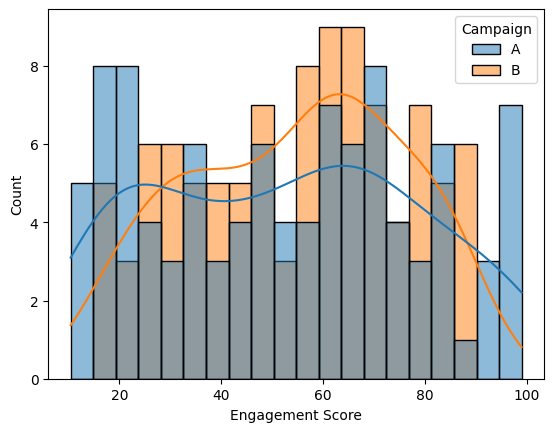

In [ ]:
# Visualize distributions of data across the campaigns

sns.histplot(data=data, x='Engagement Score', hue='Campaign', bins=20, kde=True)
plt.show()

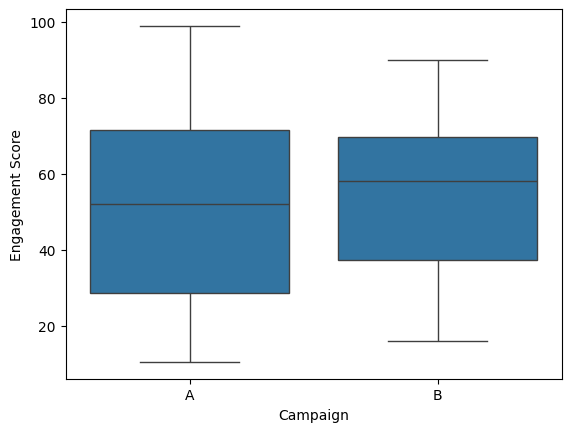

In [ ]:
# Boxplot to inspect spread and outliers
sns.boxplot(data=data, x='Campaign', y='Engagement Score')
plt.show()


In [ ]:
# Check data distribution using Shapiro-Wilk test
# create variables for each campaign
campaign_a_scores = data[data['Campaign'] == 'A']['Engagement Score']
campaign_b_scores = data[data['Campaign'] == 'B']['Engagement Score']

# Calculate shapiro test parameters for each campaign
shapiro_stat_a, shapiro_p_a = shapiro(campaign_a_scores)
print('Shapiro-Wilk statistis for Campaign A: ', shapiro_stat_a)
print('Shapiro-Wilk p-value for Campaign A: ', shapiro_p_a)

shapiro_stat_b, shapiro_p_b = shapiro(campaign_b_scores)
print('Shapiro-Wilk statistis for Campaign B: ', shapiro_stat_b)
print('Shapiro-Wilk p-value for Campaign B: ', shapiro_p_b)

Shapiro-Wilk statistis for Campaign A:  0.9510603435816445
Shapiro-Wilk p-value for Campaign A:  0.0009749754084064827
Shapiro-Wilk statistis for Campaign B:  0.958954389888712
Shapiro-Wilk p-value for Campaign B:  0.0033892946595134553


The exploratory analysis shows that engagement scores for both Campaign A and Campaign B are broadly distributed across a similar range, with substantial overlap between the two groups.
- Campaign B exhibits a slightly higher mean and median engagement score compared to Campaign A, suggesting marginally higher central engagement, while Campaign A shows greater variability, as indicated by a larger standard deviation and wider spread.
- The histograms and density curves suggest that neither distribution is perfectly normal, with visible skewness and dispersion in both campaigns.
- This visual assessment is reinforced by the Shapiro–Wilk normality tests, which indicate statistically significant deviations from normality for both campaigns.

Together, these findings support the use of a non-parametric test to compare engagement levels between the two campaigns, as the assumptions required for parametric methods are not satisfied.

## c. Non-parametric testing of hypothesis

### i. Hypothesis formulation

The hypotheses are defined to assess whether there is a difference in customer engagement scores between the two independent marketing campaigns:
- *Null Hypothesis ($H_0$)*: There is no difference in the distribution of engagement scores between Campaign A and Campaign B.
- *Alternative Hypothesis ($H_1$)*: There is a difference in the distribution of engagement scores between Campaign A and Campaign B.

### ii. Mann-Whitney U test

In [ ]:
# Perform a Mann-Whitney U test

mannwhitney_stat, mannwhitney_p = mannwhitneyu(campaign_a_scores, campaign_b_scores)
print("Mann-Whitney stat: ", mannwhitney_stat)
print("Mann-Whitney p-value: ", mannwhitney_p)

Mann-Whitney stat:  4741.0
Mann-Whitney p-value:  0.5276378110739883


In [ ]:
alpha = 0.05
if mannwhitney_p < alpha:
  print("There is a different in the distibution of engagemnet scores between Campaign A and Campaign B (reject the null hypothesis)")
else:
  print("There is no difference in the distribution of engagement scores between Campaign A and Campaign B (fail to reject the null hypothesis)")

There is no difference in the distribution of engagement scores between Campaign A and Campaign B (fail to reject the null hypothesis)


### iii. Wilcoxon test

In [ ]:
# Perform wilcoxon test
wilcoxon_stat, wilcoxon_p = wilcoxon(campaign_a_scores, campaign_b_scores)
print("Wilcoxon stat: ", wilcoxon_stat)
print("Wilcoxon p-value: ", wilcoxon_p)

Wilcoxon stat:  2337.0
Wilcoxon p-value:  0.5180170574396306


The Wilcoxon test results indicate that there is no statistically significant difference in engagement scores between the two campaigns at the 5% significance level, as the p-value exceeds the chosen threshold. Consequently, the null hypothesis cannot be rejected, suggesting that Campaign A and Campaign B perform similarly in terms of customer engagement based on the available data.

# Reflect

Write a brief paragraph highlighting your process and the rationale to showcase critical thinking and problem-solving.

> Select the pen from the toolbar to add your entry. When you have completed the activity, remember to update the link on your contents page to point to your completed Notebook.

*Answer*:

This analysis followed a structured approach, beginning with data quality checks and exploratory analysis to understand the distribution, variability, and overlap of engagement scores across campaigns.

Visual inspection and formal normality testing using the Shapiro–Wilk test indicated that parametric assumptions were not met, guiding the selection of appropriate non-parametric methods.

By applying and interpreting both the Mann–Whitney U and Wilcoxon tests, I ensured that conclusions were statistically robust while remaining mindful of the limitations of hypothesis testing and the distinction between statistical significance and practical relevance.